# Modelando com Decision tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.listdir()

['titanic-tree.ipynb',
 'test.csv',
 'v5.csv',
 '.ipynb_checkpoints',
 'v3.csv',
 'v6.csv',
 'v2.csv',
 'gender_submission.csv',
 'v4.csv',
 'train.csv',
 'titanic-knn.ipynb',
 'titanic.zip']

In [3]:
df = pd.read_csv("train.csv")
tt = pd.read_csv('test.csv')

## Tratando valores faltantes

### Train data

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.loc[:,'Age'] = df['Age'].fillna(df['Age'].mean())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dropna(axis=1, thresh=600, inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [7]:
df.dropna(axis=0, subset=['Embarked'], inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Test data

In [8]:
tt.loc[:,'Age'] = tt['Age'].fillna(tt['Age'].mean())
tt.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
tt.dropna(axis=1, thresh=300, inplace=True)
tt.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [10]:
tt.loc[:,'Fare'] = tt['Fare'].fillna(0)

## Mapeando Valores para inteiros

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Mapa
- Sex
- Embarked
- Fare

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
def map_Embarked(embarked):
    if embarked == "S":
        return 1
    elif embarked == "C":
        return 2
    elif embarked == "Q":
        return 3

In [14]:
df.loc[:, 'Embarked'] = df['Embarked'].apply(map_Embarked)
tt.loc[:, 'Embarked'] = tt['Embarked'].apply(map_Embarked)

In [15]:
def map_Sex(s):
    if s == 'male':
        return 1
    else:
        return 2

In [16]:
df.loc[:, 'Sex'] = df['Sex'].apply(map_Sex)
tt.loc[:, 'Sex'] = tt['Sex'].apply(map_Sex)

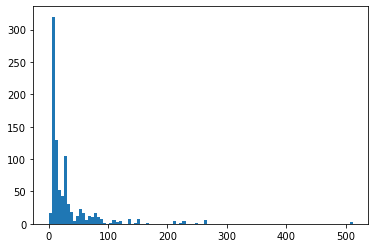

In [17]:
plt.hist(df['Fare'], 100);

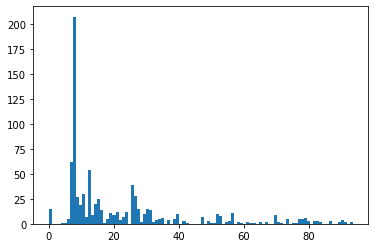

In [18]:
plt.hist(df['Fare'][df['Fare']<=100], 100);

In [19]:
def map_Fare(fare):
    if fare <= 18:
        return 1
    elif fare <= 35:
        return 2
    elif fare <= 80:
        return 3
    elif fare > 80:
        return 4

In [20]:
df.loc[:, 'Fare'] = df["Fare"].apply(map_Fare)
tt.loc[:, 'Fare'] = tt["Fare"].apply(map_Fare)

In [21]:
def map_Age(idade):
    if idade < 13:
        return 1
    elif idade < 18:
        return 2
    elif idade < 60:
        return 3
    elif idade >= 60:
        return 4

In [22]:
df.loc[:, 'Age'] = df["Age"].apply(map_Age)
tt.loc[:, 'Age'] = tt["Age"].apply(map_Age)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,3,1,0,A/5 21171,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,3,1,0,PC 17599,3,2
2,3,1,3,"Heikkinen, Miss. Laina",2,3,0,0,STON/O2. 3101282,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,3,1,0,113803,3,1
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,1,1


## Aplicando o algorítmo

In [44]:
from sklearn.tree import DecisionTreeRegressor

target = 'Survived'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

print(target)
print()
print(features)

model = DecisionTreeRegressor(max_depth = 3)
model.fit(df[features], df[target])
y_pred = model.predict(tt[features])
tt.loc[:,"Survived"] = np.rint(y_pred).astype(int)
tt[["PassengerId","Survived"]].to_csv('decision_v1.csv', index=False) # 0.78229

Survived

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [45]:
tt

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,3,0,0,330911,1,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,3,1,0,363272,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,1,3,0
3,895,3,"Wirz, Mr. Albert",1,3,0,0,315154,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,3,1,1,3101298,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,3,0,0,A.5. 3236,1,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",2,3,0,0,PC 17758,4,2,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,3,0,0,SOTON/O.Q. 3101262,1,1,0
416,1308,3,"Ware, Mr. Frederick",1,3,0,0,359309,1,1,0
